In [207]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots


# loading data
GOT = pd.read_excel('./GOT_character_predictions.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
GOT.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [208]:
GOT.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [209]:
# imputing everything else with the median

# Total_Bsmt_SF
fill = 0
GOT['title'] = GOT['title'].fillna(fill)


# Garage_Cars
fill = 0
GOT['culture'] = GOT['culture'].fillna(fill)


# Garage_Area
fill = 0
GOT['dateOfBirth'] = GOT['dateOfBirth'].fillna(fill)


# log_Mas_Vnr_Area
fill = 0
GOT['mother'] = GOT['mother'].fillna(fill)


# Total_Bsmt_SF
fill = 0
GOT['father'] = GOT['father'].fillna(fill)


# Garage_Cars
fill = 0
GOT['heir'] = GOT['heir'].fillna(fill)


# Garage_Area
fill = 0
GOT['house'] = GOT['house'].fillna(fill)


# log_Mas_Vnr_Area
fill = 0
GOT['spouse'] = GOT['spouse'].fillna(fill)


# Garage_Cars
fill = 0
GOT['isAliveMother'] = GOT['isAliveMother'].fillna(fill)


# Garage_Area
fill = 0
GOT['isAliveFather'] = GOT['isAliveFather'].fillna(fill)


# log_Mas_Vnr_Area
fill = 0
GOT['isAliveHeir'] = GOT['isAliveHeir'].fillna(fill)


# Garage_Area
fill = 0
GOT['isAliveSpouse'] = GOT['isAliveSpouse'].fillna(fill)


# log_Mas_Vnr_Area
fill = 0
GOT['age'] = GOT['age'].fillna(fill)

In [210]:
GOT.isnull().sum(axis = 0)

S.No                          0
name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
dtype: int64

In [211]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [212]:
df_corr = GOT.corr().round(2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
age                           0.05
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isAliveSpouse                -0.01
isNoble                      -0.04
isAliveFather                -0.04
isMarried                    -0.05
dateOfBirth                  -0.06
book2_A_Clash_Of_Kings       -0.07
isAliveHeir                  -0.08
isAliveMother                -0.12
S.No                         -0.13
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64

In [213]:
GOT.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [214]:
# declaring explanatory variables
GOT_data = GOT.drop('isAlive', axis = 1)


# declaring response variable
GOT_target = GOT.loc[ : , 'isAlive']

In [215]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_target) # preserving balance


# merging training data for statsmodels
GOT_train = pd.concat([x_train, y_train], axis = 1)

In [216]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [217]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """isAlive ~ 
                                book4_A_Feast_For_Crows +      
                                age +                           
                                book5_A_Dance_with_Dragons +   
                                book3_A_Storm_Of_Swords +       
                                isAliveSpouse +                
                                isNoble  """,
                           data    = GOT_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.525125
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.074     
Dependent Variable:    isAlive             AIC:                 1852.9867 
Date:                  2021-12-05 17:46    BIC:                 1891.2623 
No. Observations:      1751                Log-Likelihood:      -919.49   
Df Model:              6                   LL-Null:             -992.53   
Df Residuals:          1744                LLR p-value:         5.2098e-29
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        8.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                   0.7558   0.1002  7.5425 0.0000  0.5594  0.9522
book4_A_Feast_For_Crows     1.5400   0.1395 11.0392 0.0000  1.2666  1.8134
age                         0.0000   0.0000  0.6543 0.5129 -0.0000  0.0001
book5_A_Dance_with_Dragons -0.2663   0.1310 -2.0329 0.0421 -0.5230 -0.0096
book3_A_Storm_Of_Swords    -0.4728   0.1296 -3.6475 0.0003 -0.7268 -0.2187
isAliveSpouse              -0.2297   0.1898 -1.2104 0.2261 -0.6018  0.1423
isNoble                    -0.2558   0.1169 -2.1873 0.0287 -0.4849 -0.0266
==========================================================================

"""

In [218]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ isAlive ~
                               book4_A_Feast_For_Crows +   
                                                     age +                       
                              book5_A_Dance_with_Dragons +
                                 book3_A_Storm_Of_Swords +      
                                           isAliveSpouse +            
                                                 isNoble +                  
                                           isAliveFather +               
                                               isMarried +                  
                                             dateOfBirth +                 
                                  book2_A_Clash_Of_Kings +    
                                             isAliveHeir +                  
                                           isAliveMother +                                        
                                 book1_A_Game_Of_Thrones +     
                                              popularity +                   
                                 numDeadRelations""",           
                                data    = GOT_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full. summary2()

Optimization terminated successfully.
         Current function value: 0.497287
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.123     
Dependent Variable:    isAlive             AIC:                 1773.4988 
Date:                  2021-12-05 17:46    BIC:                 1860.9858 
No. Observations:      1751                Log-Likelihood:      -870.75   
Df Model:              15                  LL-Null:             -992.53   
Df Residuals:          1735                LLR p-value:         2.6148e-43
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        9.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                   0.9703   0.1086  8.9370 0.0000  0.7575  1.1831
book4_A_Feast_For_Crows     1.6330   0.1511 10.8068 0.0000  1.3369  1.9292
age                        -0.0015   0.0006 -2.7883 0.0053 -0.0026 -0.0005
book5_A_Dance_with_Dragons -0.0452   0.1423 -0.3177 0.7507 -0.3241  0.2337
book3_A_Storm_Of_Swords    -0.2658   0.1439 -1.8466 0.0648 -0.5479  0.0163
isAliveSpouse               0.7412   0.3578  2.0714 0.0383  0.0399  1.4425
isNoble                    -0.1905   0.1250 -1.5241 0.1275 -0.4355  0.0545
isAliveFather               0.6810   1.3456  0.5061 0.6128 -1.9563  3.3183
isMarried                  -0.7515   0.3206 -2.3439 0.0191 -1.3798 -0.1231
dateOfBirth                -0.0016   0.0006 -2.8351 0.0046 -0.0026 -0.0005
book2_A_Clash_Of_Kings     -0.2881   0.1412 -2.0399 0.0414 -0.5649 -0.0113
isAliveHeir                -0.4952   0.7233 -0.6846 0.4936 -1.9128  0.9225
isAliveMother              -1.7255   0.8760 -1.9697 0.0489 -3.4424 -0.0086
book1_A_Game_Of_Thrones    -0.5117   0.1584 -3.2294 0.0012 -0.8222 -0.2011
popularity                 -0.8911   0.5007 -1.7798 0.0751 -1.8724  0.0902
numDeadRelations           -0.0789   0.0510 -1.5463 0.1220 -0.1788  0.0211
==========================================================================

"""

In [219]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['book4_A_Feast_For_Crows',"age",'book5_A_Dance_with_Dragons','book3_A_Storm_Of_Swords'      
 ,'isAliveSpouse','isNoble','isAliveFather','isMarried','dateOfBirth','book2_A_Clash_Of_Kings'    
 ,'isAliveHeir','isAliveMother','book1_A_Game_Of_Thrones','popularity',                  
 'numDeadRelations'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['book4_A_Feast_For_Crows', 'age','book5_A_Dance_with_Dragons',  
'book3_A_Storm_Of_Swords','isAliveSpouse','isNoble'],

 # significant variables only (set 2)
 'logit_sig_2'  : ['age', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
                   'isAliveFather', 'isNoble',]


}

In [220]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['book4_A_Feast_For_Crows', 'age', 'book5_A_Dance_with_Dragons', 'book3_A_Storm_Of_Swords', 'isAliveSpouse', 'isNoble', 'isAliveFather', 'isMarried', 'dateOfBirth', 'book2_A_Clash_Of_Kings', 'isAliveHeir', 'isAliveMother', 'book1_A_Game_Of_Thrones', 'popularity', 'numDeadRelations']


First Significant p-value Model:
--------------------------------
['book4_A_Feast_For_Crows', 'age', 'book5_A_Dance_with_Dragons', 'book3_A_Storm_Of_Swords', 'isAliveSpouse', 'isNoble']


Second Significant p-value Model:
---------------------------------
['age', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveFather', 'isNoble']



In [221]:
# train/test split with the full model
GOT_data   =  GOT.loc[ : , candidate_dict['logit_sig']]
GOT_target =  GOT.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7476
LogReg Testing  ACCURACY: 0.7692
LogReg Train-Test Gap   : 0.0216


In [284]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[  5  45]
 [  0 145]]


In [255]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 5
False Positives: 45
False Negatives: 0
True Positives : 145



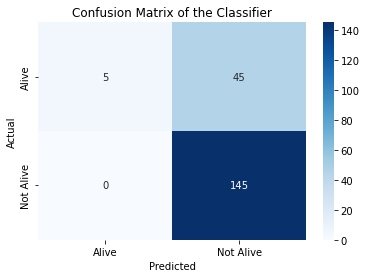

In [225]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Alive', 'Not Alive'])

In [226]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.55


In [227]:
# zipping each feature name to its coefficient
logreg_model_values = zip(GOT[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 0.75)
('age', 1.44)
('book4_A_Feast_For_Crows', 0.0)
('book5_A_Dance_with_Dragons', -0.16)
('isAliveFather', -0.35)
('isNoble', -0.13)


In [228]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [229]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8155
Full Tree Testing ACCURACY : 0.7641
Full Tree AUC Score: 0.599


In [230]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 13
False Positives: 37
False Negatives: 9
True Positives : 136



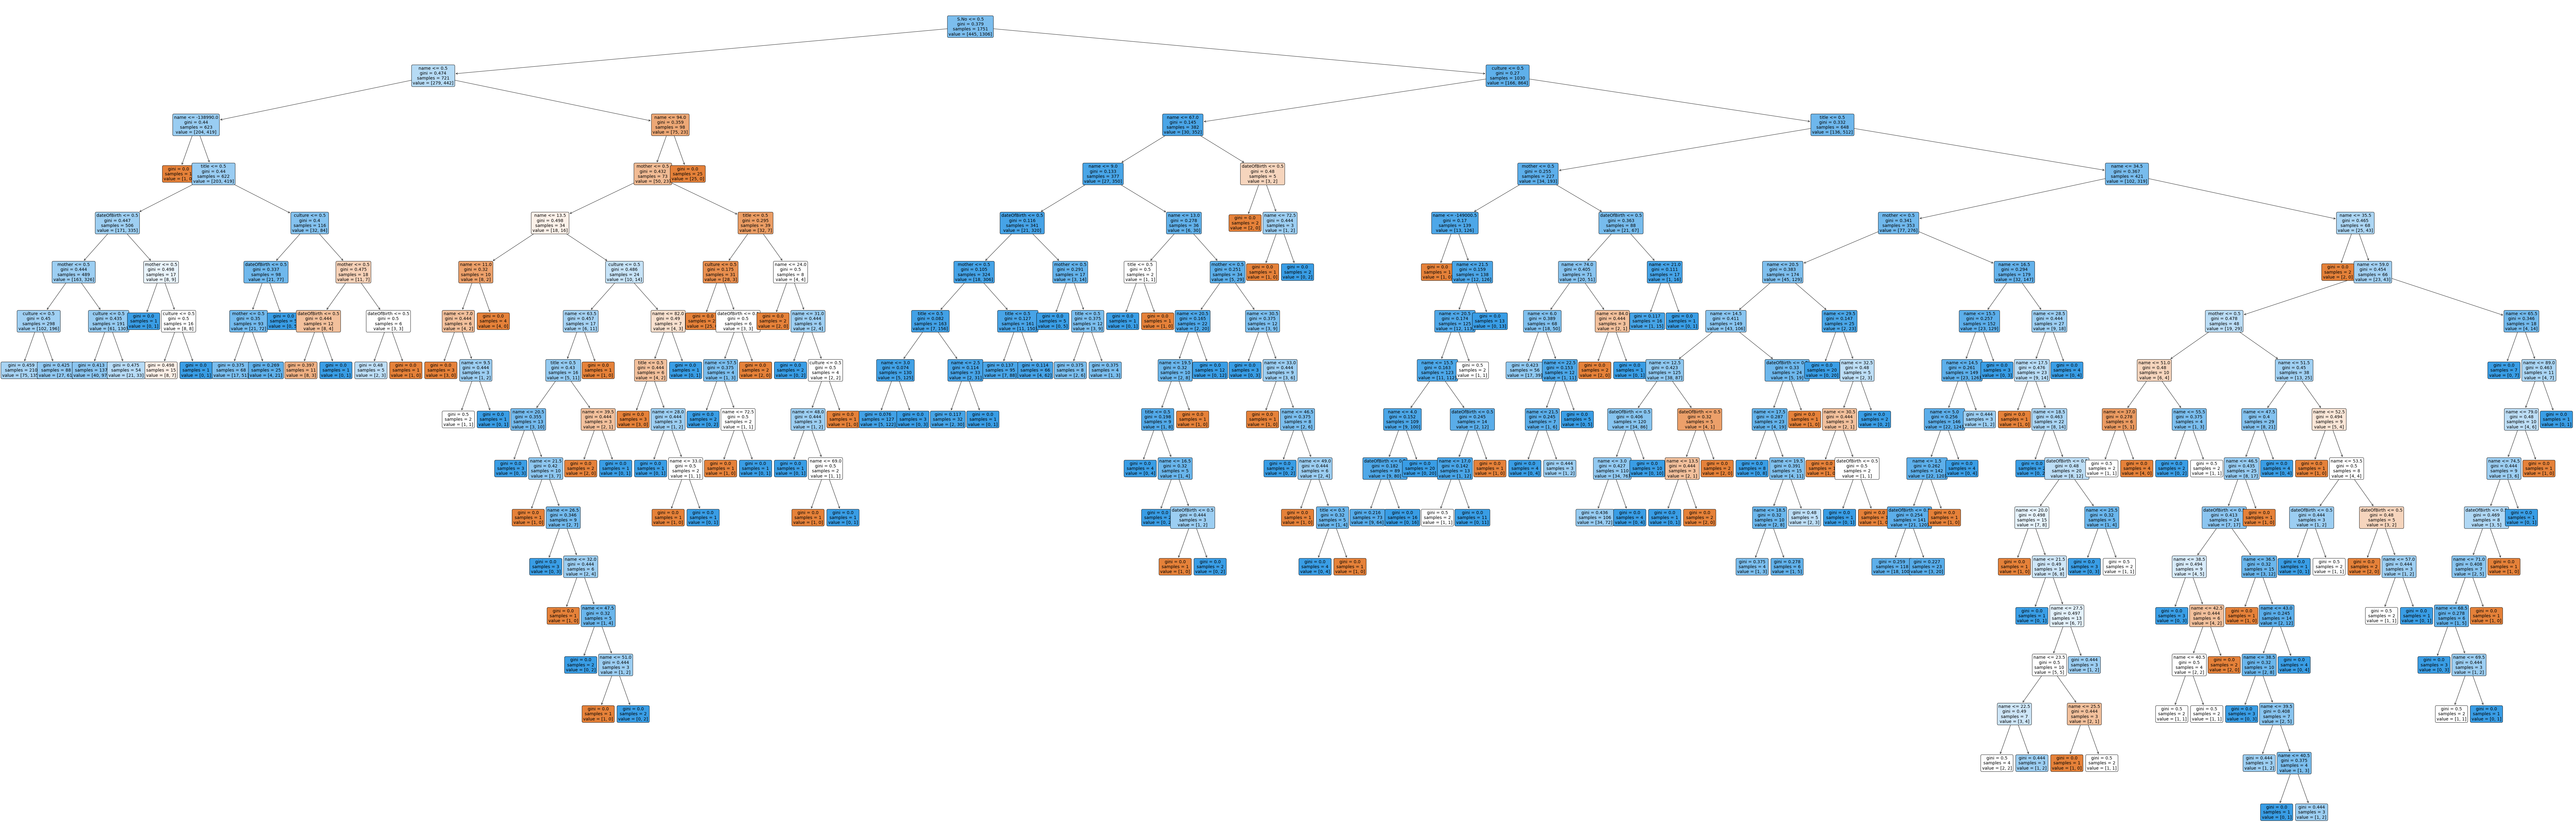

In [231]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = GOT.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [232]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

In [233]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 8,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7756
Testing  ACCURACY: 0.8154
AUC Score        : 0.64


In [234]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 14
False Positives: 36
False Negatives: 0
True Positives : 145



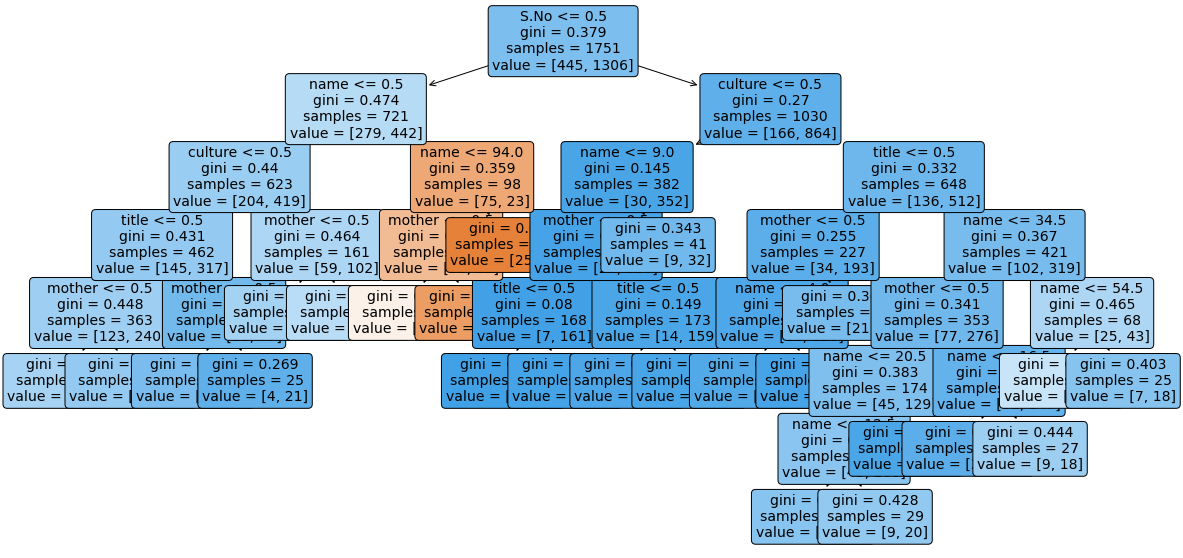

In [235]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = GOT.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

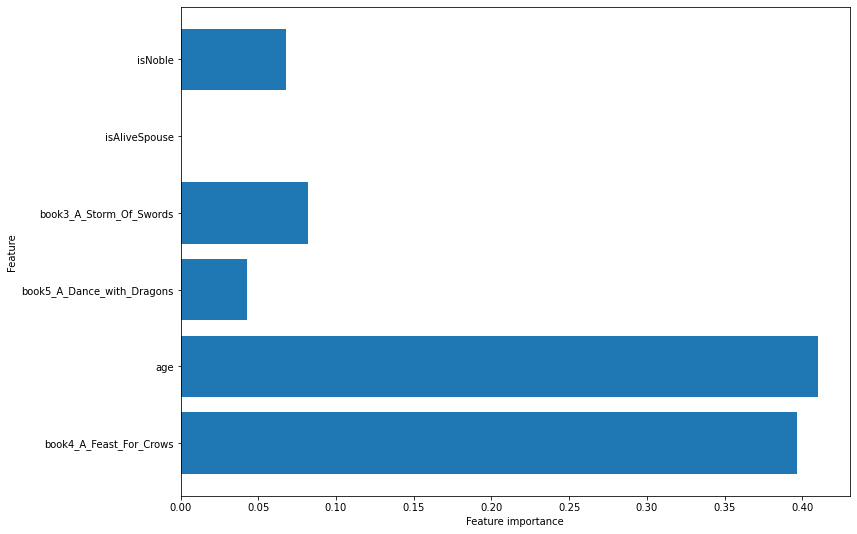

In [236]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

In [237]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.55         (5, 45, 0, 145)
Full Tree     0.599           (13, 37, 9, 136)
Pruned Tree   0.64         (14, 36, 0, 145)



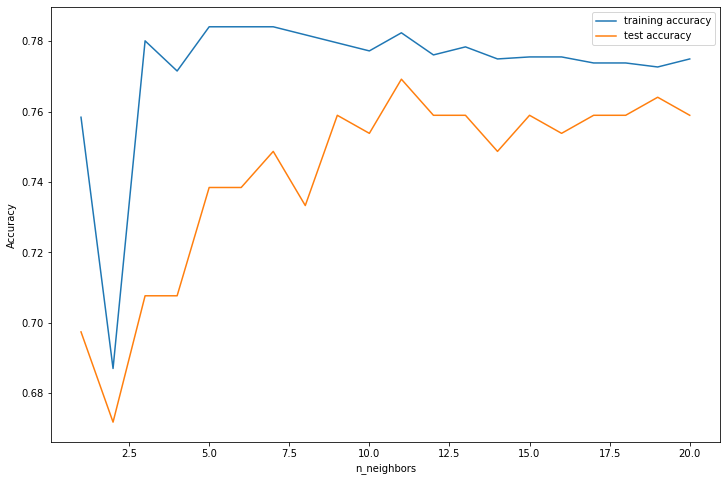

The optimal number of neighbors is: 11


In [238]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = GOT_data,
                                  y_data        = GOT_target,
                                  response_type = 'class')

In [239]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(GOT_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(GOT_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7105
Testing  ACCURACY: 0.7282
AUC Score        : 0.6338


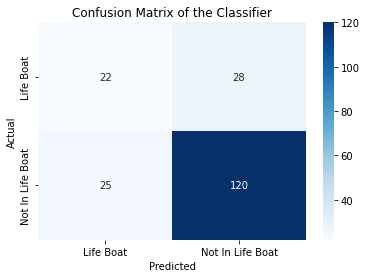

In [240]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Life Boat', 'Not In Life Boat'])

In [241]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 14
False Positives: 36
False Negatives: 0
True Positives : 145



In [263]:
########################################
# importing packages
########################################

# essentials
import matplotlib.pyplot as plt # data visualization
import pandas            as pd  # data science essentials
import numpy             as np  # mathematical essentials


# machine learning
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix


# new tools
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


########################################
# loading data and setting display options
########################################
# loading data
GOT = pd.read_excel('./GOT_character_predictions.xlsx')


# loading model performance
model_performance = pd.read_excel('./classification_model_performance.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


candidate_dict = {

 # full model
 'logit_full'   : ['book4_A_Feast_For_Crows',"age",'book5_A_Dance_with_Dragons','book3_A_Storm_Of_Swords'      
 ,'isAliveSpouse','isNoble','isAliveFather','isMarried','dateOfBirth','book2_A_Clash_Of_Kings'    
 ,'isAliveHeir','isAliveMother','book1_A_Game_Of_Thrones','popularity',                  
 'numDeadRelations'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['book4_A_Feast_For_Crows', 'age','book5_A_Dance_with_Dragons',  
'book3_A_Storm_Of_Swords','isAliveSpouse','isNoble'],

 # significant variables only (set 2)
 'logit_sig_2'  : ['age', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
                   'isAliveFather', 'isNoble',]


}
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.550,0.7476,0.7692,"(5, 45, 0, 145)"
1,Full Tree,0.599,0.8155,0.7641,"(13, 37, 9, 136)"
2,Pruned Tree,0.640,0.7756,0.8154,"(14, 36, 0, 145)"


In [264]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [265]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [266]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8058
Testing  ACCURACY: 0.8051
AUC Score        : 0.6266


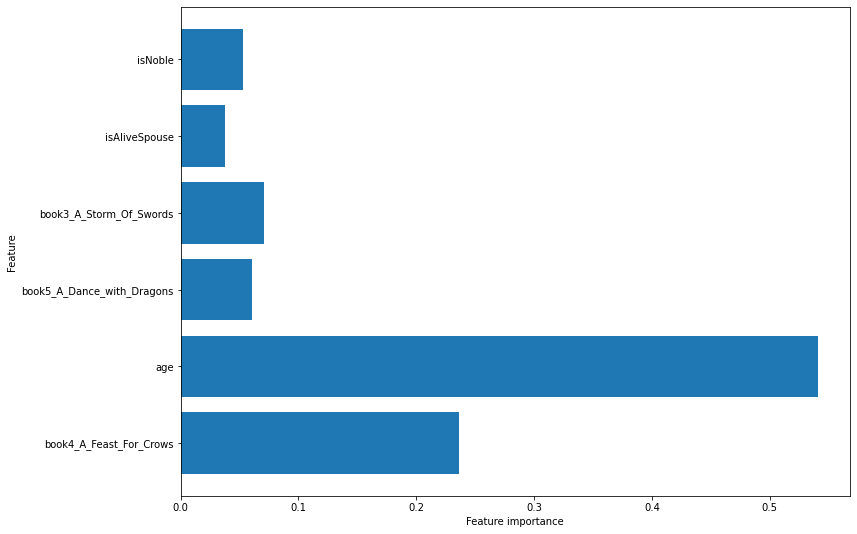

In [267]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [268]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 13
False Positives: 37
False Negatives: 1
True Positives : 144



In [269]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.5500,0.7476,0.7692,"(5, 45, 0, 145)"
1,Full Tree,0.5990,0.8155,0.7641,"(13, 37, 9, 136)"
2,Pruned Tree,0.6400,0.7756,0.8154,"(14, 36, 0, 145)"
3,Random Forest (Full),0.6266,0.8058,0.8051,"(13, 37, 1, 144)"


In [270]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.791
Testing ACCURACY : 0.8103
AUC Score        : 0.63


In [271]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 13
False Positives: 37
False Negatives: 0
True Positives : 145



In [272]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.5500,0.7476,0.7692,"(5, 45, 0, 145)"
1,Full Tree,0.5990,0.8155,0.7641,"(13, 37, 9, 136)"
2,Pruned Tree,0.6400,0.7756,0.8154,"(14, 36, 0, 145)"
3,Random Forest (Full),0.6266,0.8058,0.8051,"(13, 37, 1, 144)"
4,GBM (Full),0.6300,0.7910,0.8103,"(13, 37, 0, 145)"


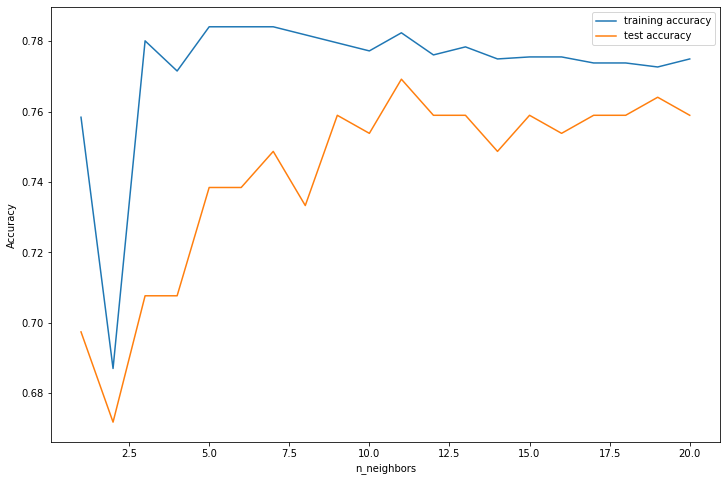

The optimal number of neighbors is: 11


In [273]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = GOT_data,
                                  y_data        = GOT_target,
                                  response_type = 'class')

In [ ]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(titanic_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(titanic_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

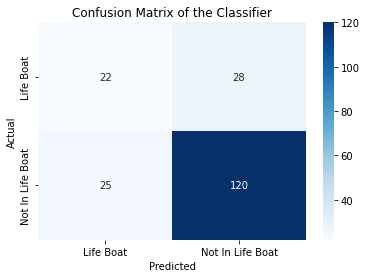

In [274]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Life Boat', 'Not In Life Boat'])

In [297]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 22
False Positives: 28
False Negatives: 25
True Positives : 120



In [344]:
#results
print(f"""
Model                               Train Score      Test Score         AUC        TN, FP, FN, TP
-----                                -----------      ----------     ----------    ----------- 
Logistic Regression                   {logreg_train_score}           {logreg_test_score}         {logreg_auc_score}        {logreg_tn, logreg_fp, logreg_fn, logreg_tp}   
KNN                                   {knn_train_score}           {knn_test_score}         {knn_auc_score}      {knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp}    
full Trees                            {full_tree_train_score}           {full_tree_test_score}         {full_tree_auc_score}       {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}    
Random Forest                         {rf_train_acc}           {rf_test_acc}         {rf_auc}      {rf_tn, rf_fp, rf_fn, rf_tp}   
GBM                                   {gbm_train_acc}            {gbm_test_acc}         {gbm_auc}        {gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp}
pruned Trees(my choosen model)        {pruned_tree_train_score}           {pruned_tree_test_score}         {pruned_tree_auc_score}        {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}


""")




Model                               Train Score      Test Score         AUC        TN, FP, FN, TP
-----                                -----------      ----------     ----------    ----------- 
Logistic Regression                   0.7476           0.7692         0.55        (5, 45, 0, 145)   
KNN                                   0.7105           0.7282         0.6338      (22, 28, 25, 120)    
full Trees                            0.8155           0.7641         0.599       (13, 37, 9, 136)    
Random Forest                         0.8058           0.8051         0.6266      (13, 37, 1, 144)   
GBM                                   0.791            0.8103         0.63        (13, 37, 0, 145)
pruned Trees(my choosen model)        0.7756           0.8154         0.64        (14, 36, 0, 145)



